# 사전 준비

## 구글 드라이브 마운트

1) 왼쪽의 네 개 아이콘 중, 맨 아래 아이콘 클릭해,

2) Google Drive 아이콘 클릭하여, Google Drive를 마운트합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_gdrive_path = 'drive/MyDrive/lecture_220718'

In [5]:
from pathlib import Path
import os

result_path = os.path.join(base_gdrive_path, "results")
Path(result_path).mkdir(parents=True, exist_ok=True)

# Imports

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.8.2


# 유틸

In [7]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [8]:
def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

# CNN Classification

## Fashion MNIST

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               

train_labels[:20]

4431872/4422102 [==============================] - 0s 0us/step


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델 1

### 모델 1 생성

In [10]:
def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))

  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(input)
  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(conv_1)
  pool_1 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_1)

  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(pool_1)
  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(conv_3)
  pool_2 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_3)

  flatten = keras.layers.Flatten()(pool_2)
  dense_1 = keras.layers.Dense(120)(flatten)
  dense_2 = keras.layers.Dense(84)(dense_1)
  dense_3 = keras.layers.Dense(10, activation='softmax')(dense_2)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [11]:
model = cnn_classification_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         330       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                             

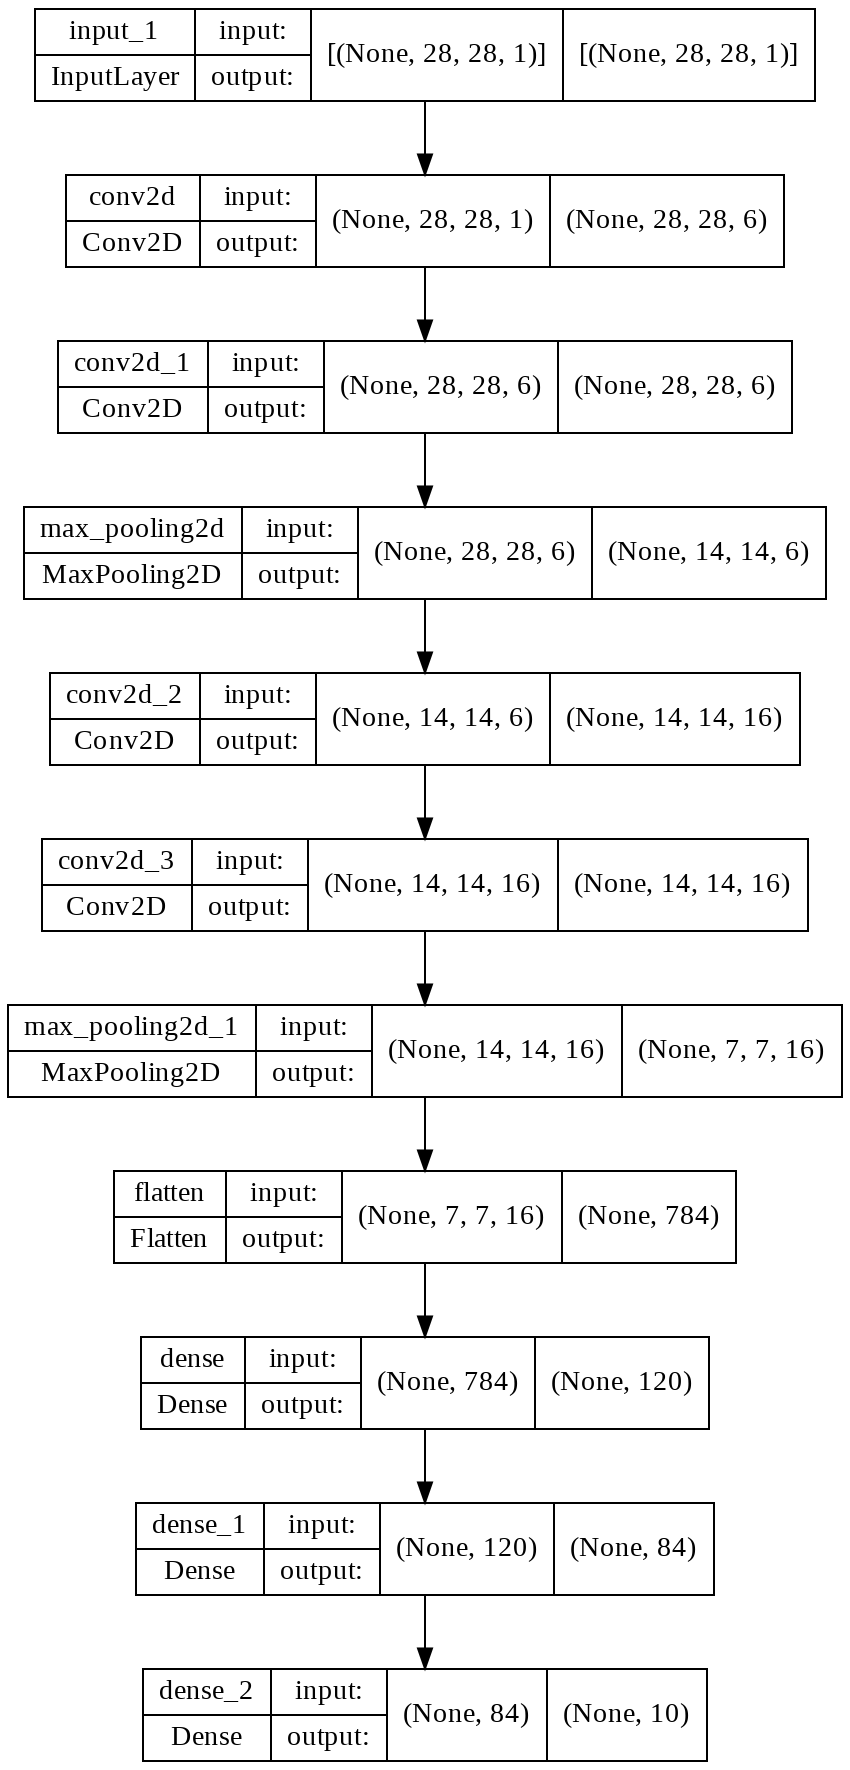

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 1 트레이닝

In [13]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4578 - accuracy: 0.8343
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2745 - accuracy: 0.8999
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2522 - accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2356 - accuracy: 0.9145
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2225 - accuracy: 0.9194
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2141 - accuracy: 0.9212
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2045 - accuracy: 0.9258
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9266
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.19

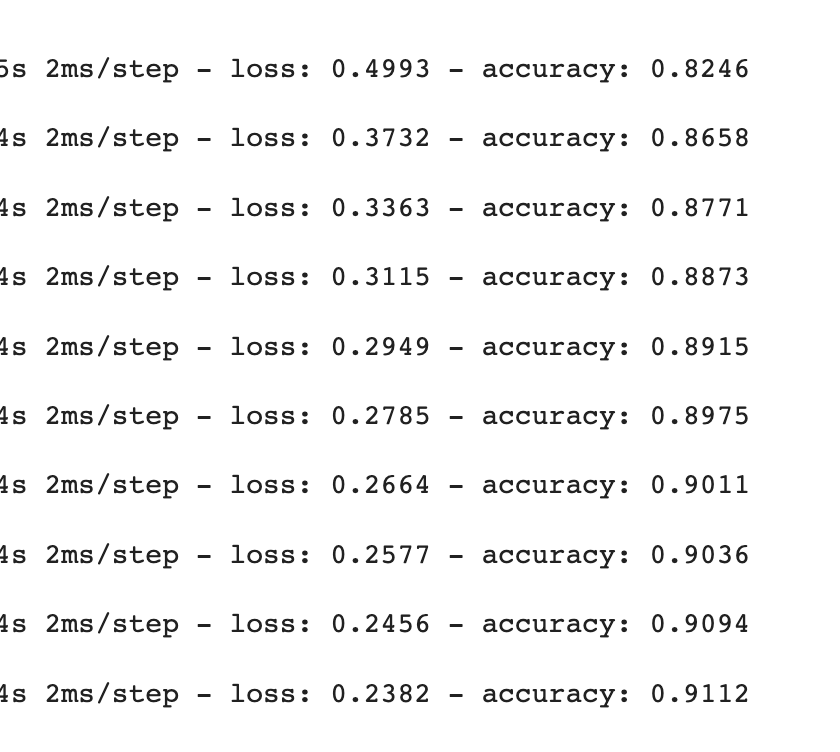

[0.8342999815940857,
 0.8865666389465332,
 0.8999166488647461,
 0.909583330154419,
 0.9145333170890808,
 0.9193500280380249,
 0.9211833477020264,
 0.9258333444595337,
 0.9265833497047424,
 0.9289000034332275]

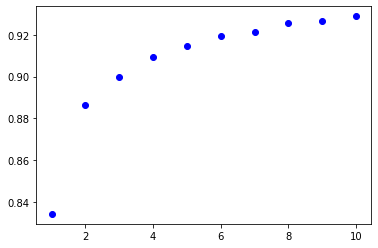

In [15]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.45784029364585876,
 0.31227758526802063,
 0.2745445966720581,
 0.25218093395233154,
 0.23563523590564728,
 0.22254081070423126,
 0.2140503078699112,
 0.20448337495326996,
 0.20081238448619843,
 0.1938610076904297]

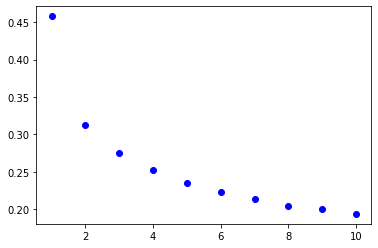

In [16]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2850 - accuracy: 0.8986 - 886ms/epoch - 3ms/step
테스트 정확도: 0.8985999822616577


In [18]:
save_model(os.path.join(base_gdrive_path, "cnn_classification_model_000.json"), model)

import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")
model.save_weights(os.path.join(base_gdrive_path, "cnn_classification_model_000__{}.hdf5".format(run_id)))

In [19]:
json_model_path = os.path.join(base_gdrive_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(base_gdrive_path, "cnn_classification_model_000__{}.hdf5".format(run_id))
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[1.5110045e-11 6.0774266e-09 7.7386861e-11 7.6589804e-11 4.5598587e-11
 1.4630490e-05 8.0318668e-12 1.2510190e-04 2.5711415e-09 9.9986029e-01]
정답 :9


### 모델 예측

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([1.5110045e-11, 6.0774266e-09, 7.7386861e-11, 7.6589804e-11,
       4.5598587e-11, 1.4630490e-05, 8.0318668e-12, 1.2510190e-04,
       2.5711415e-09, 9.9986029e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

### 모델 예측 그리기

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

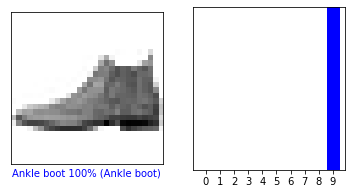

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

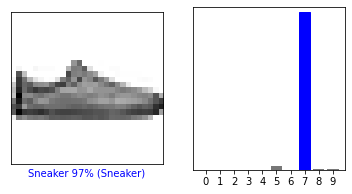

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

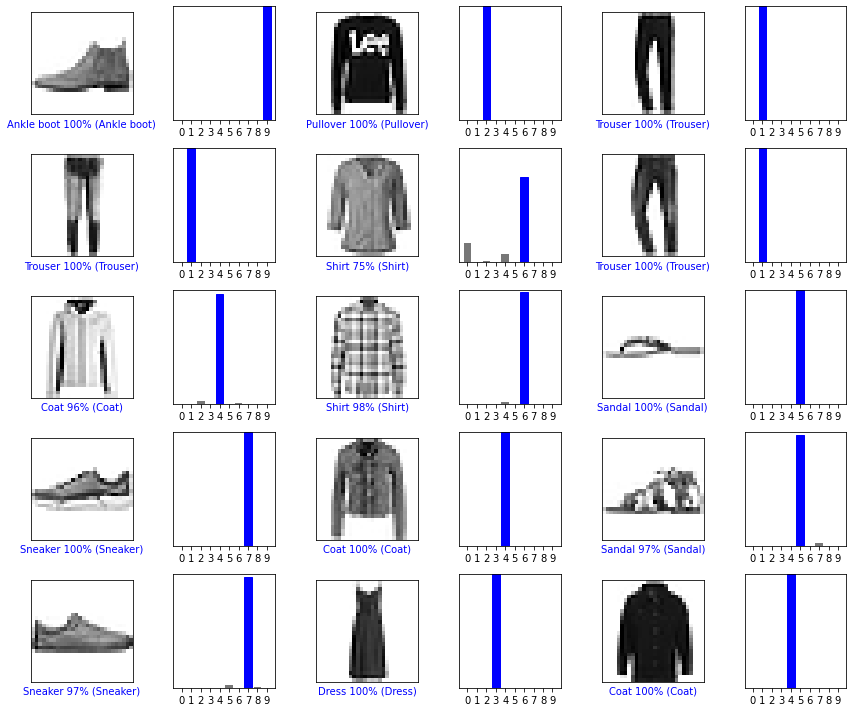

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

어제 했던 Dense 2개의 Fashion MNIST 예측 결과입니다.

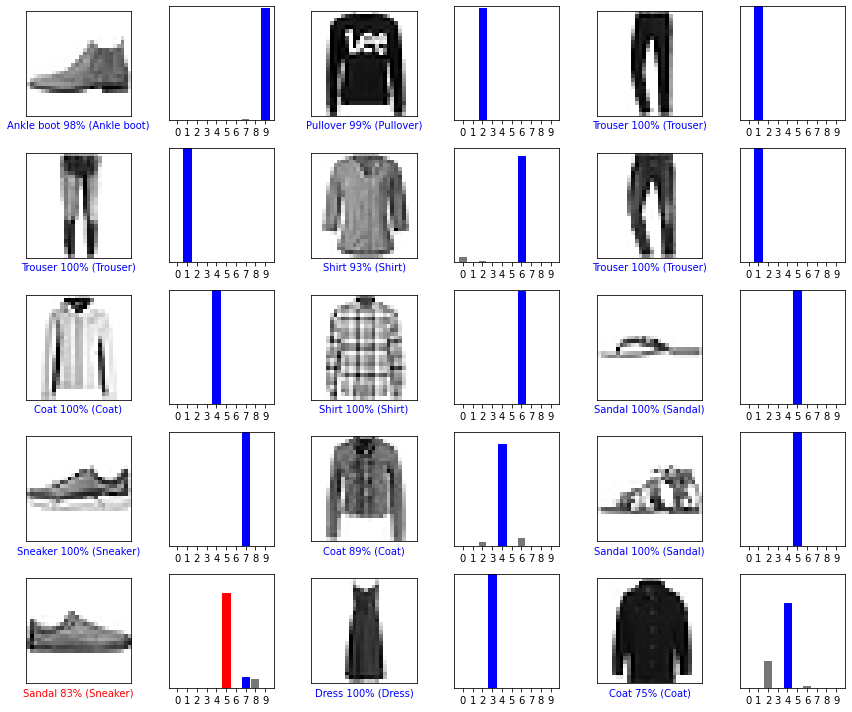